# Importando librerias

In [1]:
import pandas as pd
import numpy as np
import time
from collections import Counter
import nltk
import re
import time

# Load dataset - preprocesado

In [33]:
df_sm = pd.read_csv('../data/dev/df_sm_norm_Jul_27_22-00-20_2020.csv')

In [34]:
df_sm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130321 entries, 0 to 130320
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Unnamed: 0       130321 non-null  int64 
 1   tweet_id         130321 non-null  int64 
 2   tweet_text       130321 non-null  object
 3   sentiment        130321 non-null  object
 4   tweet_text_norm  129954 non-null  object
dtypes: int64(2), object(3)
memory usage: 5.0+ MB


In [ ]:
%%time
ll = [str(x).split(' ') for x in df_sm['tweet_text_norm']]
df_sm['tokens']=ll

In [84]:
pd.Series('jajjajajajajaj').isin((df_sm[['tweet_text_norm']].iloc[0]).values[0].split(' '))

0    False
dtype: bool

In [93]:
pd.Series('jajjajajajajaj')

0    jajjajajajajaj
dtype: object

In [92]:
df_sm[pd.Series('jajjajajajajaj').isin(df_sm['tokens'])]

c:\python37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [95]:
dict_10w['jajjajajajajaj']

1

In [97]:
df_10w.loc[9996]

Unnamed: 0                                                     10117
tweet_id                                         1023325414415052805
tweet_text         #ManUnited??????? 1-1 #Liverpool???????\n\nET ...
sentiment                                                    NEUTRAL
tweet_text_norm                                  et final prim tiemp
len_words                                                          4
Name: 9996, dtype: object

In [83]:
pd.Series(['a']).isin(['a','e'])

0    True
dtype: bool

In [35]:
df_sm[~df_sm['tweet_text_norm'].isna()].shape

(129954, 5)

In [36]:
display(df_sm[df_sm['tweet_text_norm'].isna()].groupby(['sentiment']).size())
display(df_sm[~df_sm['tweet_text_norm'].isna()].groupby(['sentiment']).size())

sentiment
NEGATIVE      1
NEUTRAL     358
POSITIVE      8
dtype: int64

sentiment
NEGATIVE      9478
NEUTRAL     109508
POSITIVE     10968
dtype: int64

In [37]:
display(df_sm[df_sm['tweet_text_norm'].duplicated()].groupby(['sentiment']).size())
display(df_sm[~df_sm['tweet_text_norm'].duplicated()].groupby(['sentiment']).size())

sentiment
NEGATIVE      137
NEUTRAL     12574
POSITIVE      346
dtype: int64

sentiment
NEGATIVE     9342
NEUTRAL     97292
POSITIVE    10630
dtype: int64

# Eliminando `tweet_text_norm` = nulos

In [38]:
df_sm = df_sm[~df_sm['tweet_text_norm'].isna()]

# Elimando `tweet_text_norm` duplicados

In [39]:
df_sm = df_sm[~df_sm['tweet_text_norm'].duplicated()]

## Explorando los grupos

In [40]:
df_sm.groupby(['sentiment']).size()

sentiment
NEGATIVE     9342
NEUTRAL     97292
POSITIVE    10629
dtype: int64

# Explorando cantidad de palabras por - tweet

In [41]:
%%time
df_sm['len_words'] = df_sm['tweet_text_norm'].apply(lambda x: len(str(x).split(' ')))

Wall time: 170 ms


In [42]:
display(len(np.sort(df_sm['len_words'].unique())))
display(np.sort(df_sm['len_words'].unique()))

44

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 47, 51, 72, 92], dtype=int64)

Wall time: 263 ms


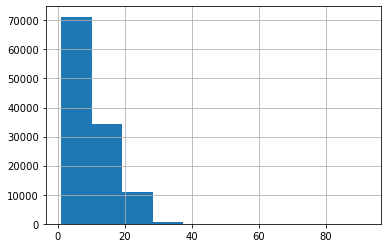

In [43]:
%%time
df_sm['len_words'].hist()

In [44]:
df_sm.groupby(['len_words']).size()

len_words
1      1126
2      3492
3      5480
4      7767
5      9466
6     10123
7     10180
8      8984
9      7775
10     6839
11     6090
12     5345
13     4624
14     4058
15     3599
16     3090
17     2787
18     2604
19     2286
20     2077
21     1865
22     1642
23     1390
24     1137
25      949
26      738
27      551
28      419
29      310
30      188
31      133
32       64
33       30
34       20
35       10
36        7
37        1
38        3
39        6
40        3
47        2
51        1
72        1
92        1
dtype: int64

In [45]:
for i in range(2,16):
    print("=> ",i,'\tsum: ',df_sm[df_sm['len_words']<=i].groupby(['sentiment']).size().sum())
    display(df_sm[df_sm['len_words']<=i].groupby(['sentiment']).size())

=>  2 	sum:  4618


sentiment
NEGATIVE      58
NEUTRAL     4401
POSITIVE     159
dtype: int64

=>  3 	sum:  10098


sentiment
NEGATIVE     202
NEUTRAL     9423
POSITIVE     473
dtype: int64

=>  4 	sum:  17865


sentiment
NEGATIVE      472
NEUTRAL     16367
POSITIVE     1026
dtype: int64

=>  5 	sum:  27331


sentiment
NEGATIVE      929
NEUTRAL     24673
POSITIVE     1729
dtype: int64

=>  6 	sum:  37454


sentiment
NEGATIVE     1517
NEUTRAL     33342
POSITIVE     2595
dtype: int64

=>  7 	sum:  47634


sentiment
NEGATIVE     2209
NEUTRAL     41867
POSITIVE     3558
dtype: int64

=>  8 	sum:  56618


sentiment
NEGATIVE     2867
NEUTRAL     49419
POSITIVE     4332
dtype: int64

=>  9 	sum:  64393


sentiment
NEGATIVE     3465
NEUTRAL     55860
POSITIVE     5068
dtype: int64

=>  10 	sum:  71232


sentiment
NEGATIVE     4049
NEUTRAL     61447
POSITIVE     5736
dtype: int64

=>  11 	sum:  77322


sentiment
NEGATIVE     4576
NEUTRAL     66451
POSITIVE     6295
dtype: int64

=>  12 	sum:  82667


sentiment
NEGATIVE     5034
NEUTRAL     70842
POSITIVE     6791
dtype: int64

=>  13 	sum:  87291


sentiment
NEGATIVE     5493
NEUTRAL     74520
POSITIVE     7278
dtype: int64

=>  14 	sum:  91349


sentiment
NEGATIVE     5885
NEUTRAL     77769
POSITIVE     7695
dtype: int64

=>  15 	sum:  94948


sentiment
NEGATIVE     6238
NEUTRAL     80668
POSITIVE     8042
dtype: int64

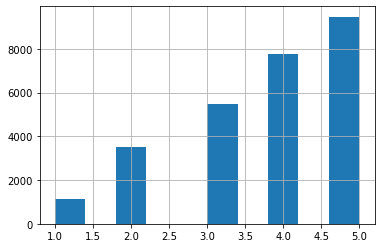

In [46]:
df_sm.loc[df_sm['len_words']<= 5,'len_words'].hist()

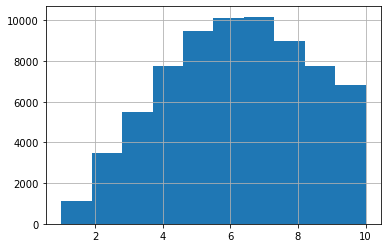

In [47]:
df_sm.loc[df_sm['len_words']<=10,'len_words'].hist()

In [48]:
display(df_sm[df_sm['len_words']<= 5].groupby(['sentiment']).size())
display(df_sm[df_sm['len_words']<=10].groupby(['sentiment']).size())

sentiment
NEGATIVE      929
NEUTRAL     24673
POSITIVE     1729
dtype: int64

sentiment
NEGATIVE     4049
NEUTRAL     61447
POSITIVE     5736
dtype: int64

In [17]:
display(df_sm[df_sm['len_words']<= 5].groupby(['sentiment']).size())
display(df_sm[df_sm['len_words']<=10].groupby(['sentiment']).size())

sentiment
NEGATIVE      928
NEUTRAL     24654
POSITIVE     1730
dtype: int64

sentiment
NEGATIVE     4048
NEUTRAL     61446
POSITIVE     5737
dtype: int64

# Funciones de frecuencia de palabras a `dict()`

In [18]:
def wordListToFreqDict(wordlist):
    wordfreq = [wordlist.count(p) for p in wordlist]
    return dict(list(zip(wordlist,wordfreq)))

def freqword_column(list_tweets):
    z = dict()
    i=0
    for tweet in list_tweets:
        #tokens = nltk.tokenize.word_tokenize(tweet)
        i+=1
        if(i%5000==0):
            print("=>",i)
        tokens = tweet.split(' ')
        z = dict(Counter(z)+Counter(wordListToFreqDict(tokens)))
    return(z)

In [19]:
type({})

dict

# Seleccionando una longitud de a los `5 palabras`

In [20]:
df_05w = df_sm[df_sm['len_words']<=5].copy()

In [21]:
%%time
dict_05w = freqword_column(df_05w['tweet_text_norm'])

=> 5000
=> 10000
=> 15000
=> 20000
=> 25000
Wall time: 2min 15s


In [22]:
len(dict_05w)

11611

In [23]:
pd.DataFrame(dict_05w.items()).sort_values(by=1,ascending=False)[:50]

,0,1
43,no,1879
109,part,1060
250,gol,1021
102,ya,783
162,vs,710
46,mas,697
166,nuev,667
342,gan,665
27,si,631
198,mejor,625


### <p>Exportando `dict_05w` </p>

In [ ]:
pd.DataFrame(dict_05w.items()).sort_values(by=1,ascending=False).to_csv('../data/dev/dic_05w_'+'_'.join((re.sub(':','-',time.ctime())).split(' ')[1:])+'.csv',index=None, header=None)

# Seleccionando una longitud de a lo más `10 palabras`

In [24]:
df_10w = df_sm[df_sm['len_words']<=10].copy()

In [25]:
%%time
dict_10w = freqword_column(df_10w['tweet_text_norm'])

=> 5000
=> 10000
=> 15000
=> 20000
=> 25000
=> 30000
=> 35000
=> 40000
=> 45000
=> 50000
=> 55000
=> 60000
=> 65000
=> 70000
Wall time: 11min


In [26]:
len(dict_10w)

21708

In [27]:
pd.DataFrame(dict_10w.items()).sort_values(by=1,ascending=False)[:50]

,0,1
82,no,8784
89,part,4710
54,gol,4256
90,ya,3466
103,mas,3450
112,equip,3136
101,si,3071
238,nuev,3050
38,jugador,2879
49,vs,2808


### Exportando diccionario de `dict_10w`

In [ ]:
pd.DataFrame(dict_10w.items()).sort_values(by=1,ascending=False).to_csv('../data/dev/dic_05w_'+'_'.join((re.sub(':','-',time.ctime())).split(' ')[1:])+'.csv',index=None, header=None)

# Generando el diccionario de palabras del dataset filtrado

In [28]:
# A class representing a Trie node:
class Trie:
	def __init__(self):

		self.key = None

		# Trie supports lowercase English characters (a - z)
		# so character size is 26
		self.character = [None] * 26


# Iterative function to insert a String in Trie
def insert(head, str):

	# start from root node
	curr = head

	for c in str:
		key = ord(c) - ord('a')

		# create a node if path doesn't exists
		if curr.character[key] is None:
			curr.character[key] = Trie()

		# go to next node
		curr = curr.character[key]

	# store key in leaf node
	curr.key = str


# Function to perform pre-order traversal of given Trie
def preorder(curr):

	# return false if Trie is empty
	if curr is None:
		return

	for i in range(26):
		if curr.character[i]:
			# if leaf node, print key
			if curr.character[i].key:
				print(curr.character[i].key)

			preorder(curr.character[i])


if __name__ == '__main__':

	# given set of keys
    '''
	dict = [
		"lexicographic", "sorting", "of", "a", "set", "of", "keys", "can", "be",
		"accomplished", "with", "a", "simple", "trie", "based", "algorithm",
		"we", "insert", "all", "keys", "in", "a", "trie", "output", "all",
		"keys", "in", "the", "trie", "by", "means", "of", "preorder",
		"traversal", "which", "results", "in", "output", "that", "is", "in",
		"lexicographically", "increasing", "order", "preorder", "traversal",
		"is", "a", "kind", "of", "depth", "first", "traversal"
	]

	head = Trie()

	# insert all keys of dictionary into trie
	for word in dict:
		insert(head, word)

	# print keys in lexicographic order
	preorder(head)
    '''

In [32]:
dict_05w['']

KeyError: False

In [30]:
# insert all keys of dictionary into trie
head = Trie()
for word in dict_05w.keys():
    insert(head, word)
preorder(head)

aagost
aajjc
aajjcoo
aandaa
aaron
aarraanc
aarranc
aaww
aay
aayy
abaj
abajit
abal
abander
abandon
abans
abarat
abarrot
abc
abdoulay
abej
abejit
abejorr
abel
aber
aberracion
abert
abidal
abiert
abigail
abism
abit
ablaned
ablas
abo
abog
abon
aborig
abort
abracadabr
abramovic
abramovich
abran
abranc
abraz
abrazoss
abrazot
abre
abren
abri
abriend
abrieron
abril
abrir
abro
abroch
absolut
abstinent
absurd
abu
abuel
abuj
abult
aburr
aburri
abus
ac
aca
acab
acabari
acabat
acabou
academi
academy
acapulc
acas
accedi
accepts
accident
accion
acech
acelerari
acent
acept
aceptenl
acerc
acert
aceved
acha
achic
achin
achiqu
aciert
aclam
aclar
aclaracion
acmil
acne
acog
acogi
acojon
acompan
acompanan
acondicion
acongoj
aconsej
acontec
acord
acordais
acort
acos
acost
acostadit
acostumbr
acotacion
acquist
acredit
actitud
activ
actor
actos
actu
actuacion
actual
actualiz
actualizacion
acuapotr
acuari
acud
acuerd
acuerdat
acuerdens
acuest
acuestat
acumul
acun
acus
acust
adaamaa
adalbert
adam
adan
adapt
adap

butland
butraguen
buu
buui
buy
buz
bv
bvb
bvh
by
bye
ca
caariicaa
cab
caball
caballer
caban
cabani
cabaret
cabece
cabecer
cabell
cabeller
cabez
cabezaa
cabezas
cabezaz
cabezon
cabion
cabr
cabrer
cabron
cabronaz
cabudar
cac
cacau
cacer
cacharr
cachet
cachond
caciqu
cad
cadabr
caden
cader
cadillac
cadiz
cadog
cador
caduc
cae
caeis
caen
caer
caes
caf
cafetaler
cafeter
cafeteroo
cag
caga
cagaa
cagadasaa
cagaoo
cagaz
cagl
cagon
cagondi
caguam
caguer
cahill
cahmpions
cai
caiced
caid
caig
cairney
caj
cajet
cajon
cal
cala
calabaz
calabri
caladit
calam
calaver
calci
calciomercat
calciomercatt
calciopoli
calcul
cald
calderon
calendari
calendario
calent
calentit
caler
cali
calic
calid
calient
calientit
calif
calific
calificacion
call
calladit
callamp
callat
callend
calles
callum
calm
calmat
calmens
calor
calsetin
calum
calv
calvari
calvert
calz
calzincill
calzon
cam
camach
camar
camaras
camarin
camaron
camarrat
cambacer
cambi
cambial
cambiar
cambiass
cambiat
came
camel
camell
camerino
cameron
cam

desbord
descabell
descalabr
descans
descansit
descar
descarg
descarril
descart
descend
descens
descent
desciend
descojon
descoloc
desconcert
desconfi
desconoc
desconoci
desconosc
descont
descontrol
describ
descripcion
descripcionesfutbol
descrit
descu
descubr
descuent
desdibuj
dese
deseab
deseari
desembols
desembuch
desempen
desencaden
desencant
desencart
deseos
desequilibr
deserv
desesper
desesperacion
desestabilic
desestim
desfas
desgast
desgraci
deshac
deshic
desi
desicion
desiert
design
desigual
desilusion
desimped
desinfl
deslav
deslig
desluc
deslumbr
desmadr
desmantel
desmarqu
desmay
desmed
desment
desmient
desmoron
desnud
desorbit
desord
desp
despaacit
despacit
desparpaj
despech
desped
despeg
despegadisim
despej
despens
desper
desperat
desperdici
despert
despid
despidi
despiert
despiertam
despint
despit
desplant
desplaz
desplieg
despreci
desprend
desproposit
despu
desquici
desquit
destac
destap
destaqu
destell
desterr
destierr
destin
destitu
destrab
destroy
destroz
destru
destru

ferr
ferrari
ferreir
ferreti
ferreyr
festej
festin
festival
fet
feud
fev
ffc
ffs
fiabil
fiabl
fiars
fibr
ficcion
fich
fichadm
fichais
fichaj
fichajajas
fichajaz
fichajazp
fichalu
fichari
fichat
fichaz
fichej
fichenl
fiebr
fiebru
fiel
field
fier
fierit
fiest
fif
fifthmount
figaa
figur
fiin
fiinn
fij
fijacion
fijat
fil
filial
filigran
filip
filipin
filli
film
filosofi
filtr
fimin
fiminm
fin
finaal
final
finalic
finaliz
finally
financ
financial
financier
find
finiquit
finisc
finish
finn
fint
fio
fiorentin
fir
fireworks
firm
firmaa
firmari
firmat
firmiin
firmin
firminm
firminoo
firminorobert
firmit
firninouu
firp
first
fisi
fisic
fitxaj
fixer
fixtur
fiyak
flac
flacam
flamant
flameg
flandri
flash
flc
flec
flexibiliz
flingu
flip
flipa
flipant
flipari
flo
floj
flojit
flop
flor
florentin
florenzi
floridablanc
florin
florinandon
flot
flow
floyd
flu
fluzcoin
fm
fo
fobi
foc
focalizat
fod
foegr
foll
follow
foment
fond
fondit
fonsec
font
football
for
forc
forest
forev
forl
form
formacion
formal
for

jujuy
jul
juli
juliaroberts
july
jumamosi
jumapili
jumm
jun
jungl
juni
junin
junior
juniors
junt
jupit
jupp
jur
jura
jurari
jurg
just
justici
justif
justific
justificacion
justin
juu
juv
juvenil
juvent
juventin
juventud
juventus
juzg
ka
kabah
kagarius
kairus
kais
kal
kalinic
kamiani
kamon
kan
kanout
kant
kar
karim
karious
kariu
karius
karm
karnesis
karuis
kashim
kasp
kbron
kc
ke
kean
kebab
keep
keilor
kein
keit
kelechi
kelly
kelvin
ken
kenedy
kep
kepaa
kepaarrizabalag
kepas
kereis
kessi
ket
kevin
keylor
kg
khe
kich
kick
kier
kiev
kik
kikin
kil
kilaz
kill
kiloton
kimmich
kimpemp
king
kingsley
kingsmeadow
kit
kits
kitu
kk
kkjjkkj
kkjkjj
kkpkknub
klaass
kloop
klopp
klub
kluivert
kluiviert
km
knockaert
know
ko
kok
koln
kompany
konami
kondogbi
kongol
konstantin
korean
koscielny
koulibaly
kouyat
kov
kovac
kovacic
kovakic
kovasic
kqksaksjkajskak
krakovi
kral
kram
krism
kro
kroenk
kross
krysti
kud
kum
kun
kund
kunf
kunn
kuntrol
kurzaw
kuscevic
kyle
laa
laacaa
labil
labor
labori
labur
lac
lacaa

multaj
multimedi
multimillonari
multipliqu
multit
mun
mund
mundanal
mundiaanuuncie
mundial
mundodelapremi
mundoo
mundook
munec
munez
muni
munich
municipal
munoz
mur
murall
murci
murcian
murcielag
muri
muriel
murill
murphy
murray
mus
musacchi
muscul
muse
music
musical
musler
musond
mustafi
mut
mutu
muu
muuy
mux
muy
muyy
mvp
mx
mxm
my
myclub
mylif
mysteri
na
naa
nab
nabil
naby
nac
nacaz
nach
nachomonreal
nachoo
nachot
naci
nacimient
nacion
nacional
nacionalic
nacionaliz
nad
nadam
nadi
naf
nah
nainggol
nainggolain
nal
nalg
nan
nanan
nand
nandez
naningol
nant
napol
napoli
napolitan
naranj
narc
narcis
naric
nariz
narizon
narr
narracion
narrador
narvaez
narvsez
nat
nath
natural
naturalez
naturaliz
naufrag
nav
navarr
navid
nay
nayim
nb
ndo
ndofir
ndombel
ne
necax
nececit
neced
neces
necesari
necesit
necesitais
nee
nefast
nefasy
neg
negart
negat
negativ
negoci
negociac
negociacion
negocias
negocion
negotiat
negr
negred
negrer
negrit
negro
neiberding
nel
neli
nelson
nemanj
nemanjamatic
nen
nene

saqu
saquenl
sar
saragozz
sarandi
sarcasm
sari
sarmient
sarpada
sarri
sarris
sarrism
sarsfield
sart
sas
sash
satan
satir
satisfaccion
satisfech
saudad
saul
sausalit
sav
savac
savi
savic
sc
scambi
schack
schalk
schar
schedul
schelott
schlupp
schmeicel
schmeichel
schneiderlein
schneiderlin
schol
scholessy
schurrl
scoleccion
scoop
scor
scott
scous
scouting
scrot
sde
sdos
seaa
seaguls
seais
seal
seam
season
seb
sebasti
sec
seccion
seconds
secret
sector
sectorial
secuel
secuenci
secuestr
sed
seden
seduc
seduj
see
seegundoo
seen
sef
seg
segement
segment
segn
segu
segud
segui
seguidor
seguil
seguimient
seguir
seguiri
seguirt
seguis
segun
segund
segunde
segunf
segur
seguramentw
segurol
sei
seis
sel
seleccion
selecion
selfi
selhurst
sell
sels
selv
sem
seman
semed
semej
semestr
semi
semifinal
semiller
semis
sempr
sen
senabr
senal
senat
senb
sencill
send
senegal
senil
senor
senorit
senoron
senorr
senorxs
sensacion
sensacional
sensation
sensibil
sensibl
sent
sentenci
senti
sentimient
senyer
senz
s

var
varan
vardy
varel
varg
vari
variabl
variant
vas
vasc
vascu
vat
vavel
vay
vayabp
vayais
vayans
vaz
vazquez
vcf
ve
vea
veam
vean
veas
vec
vecin
vecinoo
vector
vedrem
vee
veg
vegetti
vei
vein
veintip
veis
vel
velasquez
velazquez
veleshh
velesit
velez
vellit
veloc
velodrom
velori
vem
ven
venaam
venc
venci
vend
vendais
vendeel
vendeis
vender
venderi
vendi
vendr
vendri
veneg
veneti
venezolan
venezuel
veng
venga
vengaa
venganz
veni
venis
venit
vent
ventaj
ventan
venu
veo
ver
vera
veran
veranieg
verano
verben
verd
verdad
verdader
verdiblanc
verdict
vereis
verg
vergaa
vergonz
verguenz
verguez
verguin
veri
verific
verijon
verl
verm
vermael
vermal
vermaul
vern
veron
verratti
vers
version
versus
vert
vertebral
verteder
vertical
vertig
vertongh
very
verz
ves
vescon
vest
vestergaard
vestidor
vestir
vestuari
vet
vetee
veteran
vetv
vez
vi
via
viaduct
viaj
viajari
viajer
vialli
vib
vibr
vibrant
vic
vicarag
vicent
vicin
vicios
vickers
victim
victor
victori
vid
vidaa
vidagany
vidal
vide
videopresent


In [29]:
# insert all keys of dictionary into trie
head = Trie()
for word in dict_10w.keys():
    insert(head, word)
preorder(head)

aagost
aajjc
aajjcoo
aal
aam
aandaa
aanfieeld
aanholt
aaron
aarons
aarraanc
aarranc
aaww
aay
aayy
aba
abad
abaj
abajit
abal
aban
abander
abandon
abandonari
abans
abarat
abarc
abarrot
abat
abaumeyang
abbey
abc
abdallteef
abdi
abdom
abdoulay
abductor
abecedari
abej
abejit
abejorr
abel
abelit
aber
aberd
aberican
aberracion
abert
abi
abidal
abiert
abigail
abism
abismal
abit
ablan
abland
ablaned
ablas
abo
abog
aboll
abon
abona
abord
aborig
aborrezc
abort
aboubak
abouchabak
aboumeyang
about
abr
abra
abracadabr
abraham
abrahamovic
abrahams
abramovi
abramovic
abramovich
abran
abranc
abras
abrasion
abraz
abrazam
abrazoss
abrazot
abrbitr
abre
abren
abres
abreu
abreviatur
abri
abriend
abrier
abrieron
abrig
abril
abrim
abrind
abrir
abrirl
abrirt
abro
abroch
absent
absolitam
absolut
abstinent
absurd
abu
abuch
abuel
abuelit
abuj
abult
aburr
aburri
aburridor
abus
ac
aca
acab
acabari
acabat
acabou
acabron
acaci
acad
academ
academi
academiaa
academy
acadirol
acall
acalor
acantil
acapulc
acarre
acas
aca

ayez
ayi
ayit
ayme
aymeric
ayn
ayo
ayoz
aypoyindi
aysen
aysisi
aytekin
ayud
ayudadm
ayudais
ayudam
ayudan
ayudarc
ayudari
ayudat
ayuden
ayudenl
ayudenm
ayudit
ayuudaa
ayy
az
aza
azcagort
azcarrag
azipilicuet
aznalfarach
azp
azpi
azpilcuet
azpilicuet
azpilicult
azpillicuet
azplicuet
aztec
azul
azulcrem
azulgran
azulir
azulon
azurdi
azzar
ba
baah
baahh
baal
bab
babit
babos
baby
bac
bacala
bacan
bacardi
bacary
bacc
bacil
back
bad
badajoz
badelj
baden
baez
bagu
baguett
bah
baha
bahi
bahrein
bai
bail
bailam
bailarin
bailecit
bailesot
bailey
bailly
bailsecit
baily
bain
bait
baix
baj
bajais
bajat
bajel
bajez
bajisim
bajit
bajon
bak
bakary
bakayok
bal
balanc
balance
balant
balanz
balaz
balbo
balbuen
balcan
balcarc
balcaz
balcon
balconing
bald
baldini
balear
balenciag
balenziag
balin
ball
ballack
ballen
ballet
ballinh
ballon
ballotelli
balls
ballymoney
balmaced
balogun
balompi
balon
balonaz
baloncest
balotelli
balsam
baluart
balzan
bam
bamb
bambi
bambin
ban
banan
bananer
banbin
banc
bancabl
ban

calles
callet
callum
calm
calmat
calmens
calor
calorts
calsetin
calum
calur
calv
calvari
calvert
calz
calzet
calzincill
calzon
calzonaz
calzoncill
cam
camach
camar
camaras
camarg
camarin
camarograf
camaron
camarrat
camars
camat
camb
cambacer
cambi
cambial
cambiant
cambiar
cambiari
cambiass
cambiat
cambiaz
cambienl
cambient
cambridg
came
camel
camell
camer
camerin
camerino
cameron
camerun
cami
camil
camin
caminat
caminer
camion
camioner
camis
camiser
camiset
camisetaa
camisol
camit
camp
campagnol
campament
campan
campanil
campanit
campbell
campe
campeanat
campeon
campeonat
camper
campion
campist
campmany
campoeli
campoo
campuzan
camt
camus
can
canadiens
canaim
canal
canalet
canall
canalpontv
canari
canarinh
canaris
canast
canavar
canaz
canbi
canc
cancel
cancelacion
cancelal
cancerber
canch
cancher
cancin
cancion
cancun
cand
candel
candent
candidat
candidataz
candidatazoo
candidatometr
candrev
candy
canel
canelon
canep
cangrej
cangur
canh
cani
canic
caniggi
canijot
canit
canj
cannabis
ca

dej
dejadl
dejadn
dejais
dejal
dejam
dejan
dejandot
dejar
dejari
dejart
dejat
dejeis
dejel
dejem
dejemon
dejemosl
dejenl
dejenm
dejens
dejes
del
delant
delanter
delanteraz
delat
delbalsi
delbleicest
delcampeon
deleanter
deleg
deleit
delet
delg
deli
delic
delicadit
delicat
delicatess
delici
deliciaa
deliciosoo
delij
delincuent
delir
deliri
delit
deliver
dell
delor
delp
delph
delpoitr
dels
delt
delud
delusional
dem
demais
deman
demand
demands
demarai
demarc
demasi
demasia
demasiadoo
dembel
dembenos
dembul
dement
demetri
demetrimitch
demichelis
demirovic
demiti
democraci
democraski
demol
demoledor
demoni
demor
demostr
demostracion
demotr
dempsey
demuestr
demuestral
demustr
den
denay
dendonck
dendonk
deni
denigr
denilson
denis
denl
denm
dennis
dennys
denomin
dens
dent
dentist
dentr
denuev
denunci
denunciari
deos
dep
depar
depart
departament
department
depay
depend
dependd
depender
depilacion
deplor
depoitr
depor
deport
deportiv
deportoloyevsky
deportv
deposit
depot
depr
depred
depres
depre

eexcelent
efavor
efect
efectivod
efectu
efet
effort
eficaci
eficaz
efimer
efl
efoore
efootball
efor
efrain
efren
ege
egg
egi
egipci
egipt
ego
egocentr
egos
egres
egyptiaa
eh
ehechac
ehh
ei
eib
eidur
eigentor
eii
eiis
eil
eindhov
eith
eitrach
ejari
eje
ejecucion
ejecut
ejej
ejejejdetr
ejem
ejempl
ejemplar
ejerc
ejercer
ejerci
ejercici
ejercit
ejo
ek
ekip
ekipaz
eko
ela
elabor
elaboracion
elaborat
elam
elast
elbow
elche
elchiqui
elcom
elcontrat
ele
eleccion
electr
electriz
electron
eleg
eleganz
elegi
elegiri
elek
element
elemental
elenc
eleon
eles
elev
eleval
elgatopereir
elgoldigital
eli
elicech
eliel
eliez
elif
elig
eligi
elij
elimida
elimin
eliminacion
eliminat
eliminatori
elimnatori
elit
eliud
ell
ellenor
ellis
ello
ellooss
ellosml
elm
elmas
elmer
elnenny
elneny
elo
elocuent
elogi
eloquent
elprat
els
else
elston
elton
elud
elviej
ely
elyounoussi
em
emad
email
emanuel
embaj
embajon
embarajin
embaraz
embarc
embarg
embarr
emblemat
emboc
embol
emboli
embols
emboqu
embrac
embriag
embriagu

formari
format
formenter
formid
formol
formos
formul
fornit
forof
forr
forro
forroo
forsberg
fortalec
fortalez
fortalezc
fortin
fortnit
fortuit
fortun
forz
forzari
fossey
fost
fosu
fot
fotaz
fotit
fotmob
fotogaleri
fotogen
fotograf
fotografi
fotogram
foton
fotu
foul
foulds
foulqu
foulqui
four
fox
foxi
foytg
foyth
foz
fpf
fra
frac
fracas
fracasinh
fraccion
fractur
fracz
fragil
fragment
fragu
fraiventin
fram
fran
franc
frances
francesc
franceschi
francesit
franchut
franci
franciaa
francis
francisc
franck
francois
francoparl
frand
franel
frani
franj
frank
frankfurt
franki
franklin
franquici
franquisi
fransu
franv
franz
fras
frasesit
fraud
fraudulent
fray
fraybentin
fraz
fre
frecuenci
frecuent
frecuentemeent
fred
freddy
freddys
fredefutbol
fredericks
fredson
fredy
freem
freg
fregon
fregossi
freguesi
freiburg
frein
freir
fren
frenari
french
frenet
frenki
frenreal
frent
frenton
frer
fres
fresc
frescur
fresh
fresn
fresquit
frey
frez
fri
friald
friament
friccion
friday
friend
friens
frij
friki

humed
humer
humild
humildat
humill
humm
hummels
hummers
humor
humphreys
hun
hund
hundi
hundimient
hungming
hunt
hunucm
huo
hurac
hurensohn
hurg
hurrac
hurrican
hurt
hus
husill
huuyy
huy
huyend
hyde
hyndman
hype
hypervenom
hyypi
iag
iamgin
ian
ias
iba
ibacach
ibai
ibais
ibam
iban
ibanez
ibarg
ibarr
ibas
ibe
ibeji
iber
iberi
ibiz
ibo
iborr
ibra
ibraa
ibracadabr
ibrahimovi
ibrahimovic
ibro
icard
icardi
icardii
icc
iceberg
icem
ici
icon
icoonn
ictus
id
ida
ide
ideal
idek
idelogi
idem
ident
identif
identific
ideologi
idi
idiiot
idili
idiol
idiom
idiosincrasi
idiot
idiotez
ido
idol
idolatr
idolaz
idoloo
idriss
ids
idun
iemp
iend
if
ifrafagoesweg
ifran
ig
igeld
igitamb
iglesi
ignaci
ignor
ignoral
ignorant
ignot
igor
igss
igual
iguald
igualin
igualit
igualitoo
igul
iheanach
ii
iidooloo
iiwwoobbii
iizquieerdo
iizquierdo
ija
ijo
ijol
ijoss
ijueput
ik
ike
ikem
iker
iki
il
ildefons
ilegal
ili
ilic
ilicitan
ilimit
ilkay
illac
illan
illarramendi
illinois
illo
illos
illustrator
ilumin
iluminacion
ilu

leah
leak
leal
lealt
leam
lean
leand
leandr
leandrozapponi
learn
leas
least
leath
leav
lebant
lebrijan
lebron
leccion
lech
lechit
lechuz
lector
lectur
led
ledesm
ledley
lee
leeds
leei
leel
leem
leen
leer
leerl
leermaa
leers
left
leg
legal
legan
legend
legendari
legends
legg
legion
legisl
legitim
leguizamon
legumin
lehm
lehmann
lei
leicest
leicestercity
leichest
leid
leigh
leighton
leij
lein
leinton
leipzig
leir
leist
leisteis
leiv
lej
lejan
lejis
lekeiti
lel
lem
lemic
lempir
len
lencost
lend
lendod
lendoir
lener
lenglet
lengleth
lengu
lenguaj
lenin
lennon
lens
lent
lentej
lentejit
lentini
lentit
lentitud
leo
leomessi
leon
leonard
leonel
leonin
leoo
lep
lepr
lepros
lequip
lerd
lerdez
lerel
lerm
lermaa
lerooy
leroy
leroyy
les
lesbi
lesbian
lescan
lesg
lesion
lesionous
lesli
lesp
less
lest
let
letal
letarg
letoni
letr
letrer
lets
lev
levach
levandosky
levant
levantar
levantari
levantart
levantat
levantenl
levatej
level
levels
leveon
leverkus
leverpool
levi
levy
lew
lewandoski
lewandowski


mee
meek
meencant
meeoll
meer
meet
meeting
meg
megac
megacontrat
megacrack
megacrak
megacuot
megaestadi
megaestrell
megaofert
megar
megastor
megasueld
megor
meh
mei
meirel
mej
mejeng
meji
mejican
mejior
mejon
mejoor
mejor
mejoral
mejorat
mejorcit
mejore
mejori
mekau
mel
melani
melbourn
melen
melhor
meli
melill
melillens
melleval
mellor
melodi
melon
melwood
mem
memb
membresi
membret
memor
memori
memphis
men
menac
menaj
menanti
menarik
menci
mencion
mencional
mencionan
mend
mendez
mendi
mendig
mendoz
mendy
mene
menem
menez
menginc
menin
menor
menospreci
mens
mensah
mensaj
mensajit
mensit
mensual
ment
mental
mentality
mentall
mentiendot
mention
mentir
mentiraa
mentirot
mentirt
menton
mentor
mentors
menu
menud
menui
menuni
meo
meqetref
mequetref
mer
merah
merc
mercad
mercade
mercaderi
mercadill
mercadodefichaj
mercadolog
mercadon
mercanci
mercantil
mercat
merced
mercenari
merchandesing
merchant
merci
mercuri
mercurials
mercury
merd
merdall
merdes
mere
merec
merecedor
mereceis
mereceri
mere

paquetas
paquetass
paquetax
paquetaz
paqueton
paquirrin
par
para
paraa
parabarcelon
parac
paradinh
paradis
paradoj
paradon
paradoss
parafarmaci
parafras
paragu
paraguay
parais
paraj
paral
paralel
parallel
paran
paranaens
parar
pararar
parari
parasit
parat
paratici
paraw
parc
parcer
parcerit
parch
parcial
parcomatarazz
pard
pardew
pardill
pare
parec
pareceis
parecer
pareceri
pareci
parecid
pared
pareix
parej
parejit
parel
parentesis
parerec
pareri
pares
parev
parezc
pari
parid
paridad
parider
parient
paris
parisc
parisin
park
parking
parl
parlament
parlant
parlay
parley
parlour
parm
parodi
parol
paron
parot
parqu
parqueader
parr
parraf
parrafit
parrand
parravicini
parri
parrill
parroqui
part
partans
partd
parti
partici
particip
participacion
participar
particul
particular
particularly
partid
partidari
partidas
partidaz
partidazazazazazazaz
partidazl
partidazoo
partidit
partido
partidob
partidoo
partir
partiri
partirt
partisipacion
partit
partn
partners
partnership
partud
party
parv
pas


publimetr
publiqu
pucel
puch
puchad
puchi
pud
pude
pudier
pudr
pudret
pue
pueb
puebl
pued
puedee
puedoorl
puef
puel
puent
puerc
pueril
puert
pues
puest
puf
puff
pufinh
pug
pugn
puig
puit
puj
pul
pulc
pulcian
pulcr
pulesit
pulg
puli
pulisi
pulisic
pulmon
pulp
pulpit
puls
pulser
pum
pumit
pumm
pump
pun
punal
punet
punetaa
puneter
punetin
punfamentalists
punt
puntaj
puntapi
puntaz
punte
punter
punteri
puntillaz
puntit
puntu
puntuacion
puntual
puntualiz
puntualizacion
pup
pupil
pur
purif
purisim
purit
purocrioll
pursuing
purtropp
pus
puselu
pusk
put
puta
putaa
putaamaadr
putaliverpool
putamadr
putan
putaz
pute
puteri
puti
putimadr
putin
putis
putisim
putit
putiz
putizon
putoflopp
puton
putoo
putoss
putrefact
puuff
puut
puutoo
puuttoo
pux
puy
puyehu
puyol
pv
pvta
pvto
px
py
qac
qarabag
qat
qatarr
qbs
qe
qen
qepd
qie
qier
qje
ql
qli
qlia
qlo
qlos
qls
qp
qpr
qqu
qreis
qu
qua
quad
quadrupl
quak
qual
quali
qualification
qualify
quality
qualy
quan
quand
quanji
quaresm
quart
quarterfinals
qud
que

sacar
sacareis
sacari
sacart
sacat
sacatel
sacens
sacerdot
sach
sack
sacking
sacow
sacr
sacrif
sacrific
sacrifici
sacrl
sacud
sacudi
sad
sadaroo
sadi
sadio
sadiomaneofficiel
sadioo
sadomasoqu
sadou
sae
saez
saf
safi
sag
sagacesport
saggiom
sagn
sagr
sah
sai
said
saint
saints
sainz
sair
saiss
saiu
sajerau
sak
sakh
sal
sala
salaah
salah
salam
salari
salarial
salarmin
salaz
salc
salced
salchich
salchichon
sald
saldr
saldreis
saldri
salem
salg
salguer
salh
sali
salient
salin
salis
salitr
sall
sallent
salmin
salmon
salogol
salogoll
salomon
salon
salonik
saloo
sals
salse
salt
salta
saltat
saltillens
saltor
salttyy
salu
salud
saludam
saludan
saludit
saludo
saludoo
saludosjuli
saludoss
saluds
salut
salutami
salv
salvacion
salvado
salvador
salvaj
salvam
salvar
salvari
salvart
salvat
sam
saman
samarret
samassekou
samb
sambu
sambuez
sami
samm
sammy
samorr
samp
sampaemery
sampaoli
sampd
sampdori
samsung
samu
samuel
san
sanababich
sanababish
sanabri
sanc
sancadill
sanch
sanchez
sancion
sancionais
s

tel
telaa
telecaf
telecronac
teledeport
teledoc
telefon
telegraaf
telegram
telegraph
telegraphnews
telemund
telemundocent
telen
telenovel
telet
teleton
teletransport
televident
televis
televisacion
televisadeport
televisenm
television
televisior
televisoon
televisor
televs
telit
telivis
tell
tells
telmex
telodij
telon
teloner
tem
temand
temat
temb
tembl
temblader
temblor
temedn
temibl
temit
temor
temp
tempeanit
temperament
temperatur
temperley
tempir
templ
templat
templr
tempor
temporad
temporada
temporadon
temporal
temporard
tempord
temporq
tempr
tempran
tempraner
tempranit
temprix
temps
temuc
ten
tenacious
tenaz
tend
tendenci
tendon
tendr
tendreis
tendri
tendriais
teneis
tenen
tenenci
tenerif
tenert
tengais
tengal
tengon
teni
teniais
tenim
tenir
tenis
tennant
tennist
tens
tension
tent
tentacion
tentador
tentat
teo
teori
teoric
tepach
tepeji
tepep
tequ
tequil
ter
terapi
terc
terceir
tercer
tercercambi
terci
terenc
terer
tergivers
teri
term
termilnertor
termim
termin
termina
terminacio

viej
viejas
viejit
viejoo
vien
viend
viendol
viendot
vienee
vieni
vient
vier
viern
vieron
viett
views
vig
vigar
vigent
vigesim
vigil
viglian
vigor
vihett
vii
viking
viktor
viktori
vil
vilanov
vilarreal
vilch
vilchez
vill
villacis
villag
villaherm
villalt
villamarin
villamelon
villan
villanov
villareal
villarreal
villarural
villeg
villi
vilment
viluc
vim
vin
vinagr
vinamarin
vinar
vinc
vincent
vincul
vinculacion
vindr
vinet
vini
vinici
vinicius
vinist
vinni
vinool
vinotint
vinov
vint
vintag
vio
viol
violenci
violent
violet
violin
vip
vir
viraj
viral
viralic
viraliz
virez
virg
virgil
virgili
virgin
virgini
virn
virreinat
virtual
virtud
virtuos
virus
vis
visc
viscaelbarc
viserit
visibil
visic
vision
visist
visit
visitan
visitar
visits
vislumbr
visor
visper
vist
vistant
vistaz
visteis
vistet
visti
vistos
visual
visualiz
vital
vitalici
vitality
vitaly
vitamin
vitess
vitol
vitor
vitori
vitriani
vitrin
vitrol
vittim
vitton
vittor
vitu
viud
viv
vivaa
vivar
vivel
vivenvi
vivez
vivi
vividor
vivi

In [ ]:
dict_10w['funcion']

In [ ]:
from typing import Tuple


class TrieNode(object):
    """
    Our trie node implementation. Very basic. but does the job
    """
    
    def __init__(self, char: str):
        self.char = char
        self.children = []
        # Is it the last character of the word.`
        self.word_finished = False
        # How many times this character appeared in the addition process
        self.counter = 1
    

def add(root, word: str):
    """
    Adding a word in the trie structure
    """
    node = root
    for char in word:
        found_in_child = False
        # Search for the character in the children of the present `node`
        for child in node.children:
            if child.char == char:
                # We found it, increase the counter by 1 to keep track that another
                # word has it as well
                child.counter += 1
                # And point the node to the child that contains this char
                node = child
                found_in_child = True
                break
        # We did not find it so add a new chlid
        if not found_in_child:
            new_node = TrieNode(char)
            node.children.append(new_node)
            # And then point node to the new child
            node = new_node
    # Everything finished. Mark it as the end of a word.
    node.word_finished = True


def find_prefix(root, prefix: str) -> Tuple[bool, int]:
    """
    Check and return 
      1. If the prefix exsists in any of the words we added so far
      2. If yes then how may words actually have the prefix
    """
    node = root
    # If the root node has no children, then return False.
    # Because it means we are trying to search in an empty trie
    if not root.children:
        return False, 0
    for char in prefix:
        char_not_found = True
        # Search through all the children of the present `node`
        for child in node.children:
            if child.char == char:
                # We found the char existing in the child.
                char_not_found = False
                # Assign node as the child containing the char and break
                node = child
                break
        # Return False anyway when we did not find a char.
        if char_not_found:
            return False, 0
    # Well, we are here means we have found the prefix. Return true to indicate that
    # And also the counter of the last node. This indicates how many words have this
    # prefix
    return True, node.counter

if __name__ == "__main__":
    root = TrieNode('*')
    add(root, "hackathon")
    add(root, 'hack')
    add(root,'copion')
    
    add(root,'copia')

    print(find_prefix(root, 'hac'))
    print(find_prefix(root, 'hack'))
    print(find_prefix(root, 'hackathon'))
    print(find_prefix(root, 'ha'))
    print(find_prefix(root, 'hammer'))
    print(find_prefix(root, 'copia'))
    print(find_prefix(root, 'copiar'))